# Projet de modélisation d'un mix énergétique issu 100% d'ENR

## VI. Profils de production avec la librairie DataFrame

### Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
from datetime import datetime

In [2]:
colors = ["palevioletred", "mediumaquamarine", "cornflowerblue", "royalblue", "slategray", 
          "mediumseagreen", "salmon", "yellow", "khaki", "0.2"]

In [3]:
vre2017 = pd.read_csv("inputs/vre_profiles2017.csv", header=None)
vre2016 = pd.read_csv("inputs/vre_profiles2016.csv", header=None)
vre2015 = pd.read_csv("inputs/vre_profiles2015.csv", header=None)
vre2014 = pd.read_csv("inputs/vre_profiles2014.csv", header=None)
vre2013 = pd.read_csv("inputs/vre_profiles2013.csv", header=None)
vre2012 = pd.read_csv("inputs/vre_profiles2012.csv", header=None)
vre2011 = pd.read_csv("inputs/vre_profiles2011.csv", header=None)
vre2010 = pd.read_csv("inputs/vre_profiles2010.csv", header=None)
vre2006 = pd.read_csv("inputs/vre_profiles2006.csv", header=None)

### 1. Utils

#### 1.1 Création DataFrame avec plusieurs vre

In [17]:
def Formater(profil, time):
    
    #on découpe le profil entre les différentes technologies génératrices
    profil.columns = ["vre", "heure", "prod"]
    profil_offshore = profil.head(8760)
    profil_onshore = profil.truncate(before = 8760, after = 17519)
    profil_pv = profil.tail(8760)
    
    profil_offshore.columns = ["vre", "heure", "prod"]
    profil_offshore['heure'] = pd.to_datetime(profil_offshore['heure'], unit='h', origin=pd.Timestamp(time))
    profil_offshore = profil_offshore.set_index('heure')
    
    profil_onshore.columns = ["vre", "heure", "prod"]
    profil_onshore['heure'] = pd.to_datetime(profil_onshore['heure'], unit='h', origin=pd.Timestamp(time))
    profil_onshore = profil_onshore.set_index('heure')
    
    profil_pv.columns = ["vre", "heure", "prod"]
    profil_pv['heure'] = pd.to_datetime(profil_pv['heure'], unit='h', origin=pd.Timestamp(time))
    profil_pv = profil_pv.set_index('heure')
    
    profils = pd.DataFrame(profil_offshore["prod"])
    profils.columns = ['offshore']
    profils.insert(1, "onshore", profil_onshore['prod'])
    profils.insert(2, "pv", profil_pv['prod'])

    return profils

#### 1.2 Création DataFrame avec plusieurs années

In [4]:
def Decouper(profil):
    #on découpe le profil entre les différentes technologies génératrices
    profil.columns = ["vre", "heure", "prod"]
    profil_offshore = profil.head(8760)
    profil_onshore = profil.truncate(before = 8760, after = 17519)
    profil_pv = profil.tail(8760)
    return profil_offshore, profil_onshore, profil_pv

def Formater_an(profil1, profil2, profil3, profil4, profil5):
    profil_offshore1, profil_onshore1, profil_pv1 = Decouper(profil1)
    profil_offshore2, profil_onshore2, profil_pv2 = Decouper(profil2)
    profil_offshore3, profil_onshore3, profil_pv3 = Decouper(profil3)
    profil_offshore4, profil_onshore4, profil_pv4 = Decouper(profil4)
    profil_offshore5, profil_onshore5, profil_pv5 = Decouper(profil5)
    
    profils_off = pd.DataFrame([profil_offshore1["prod"], profil_offshore2["prod"], profil_offshore3["prod"], profil_offshore4["prod"], profil_offshore5["prod"]])
    profils_on = pd.DataFrame([profil_onshore1["prod"], profil_onshore2["prod"], profil_onshore3["prod"], profil_onshore4["prod"], profil_onshore5["prod"]])
    profils_pv = pd.DataFrame([profil_pv1["prod"], profil_pv2["prod"], profil_pv3["prod"], profil_pv4["prod"], profil_pv5["prod"]])

    return profils_off.T, profils_on.T, profils_pv.T

In [5]:
profils_off, profils_on, profils_pv = Formater_an(vre2013, vre2014, vre2015, vre2016, vre2017)
profils_off.columns = ["2013","2014","2015","2016",'2017']
profils_off

,2013,2014,2015,2016,2017
0,0.728429,0.889286,0.674714,0.257286,0.393286
1,0.740000,0.899714,0.679000,0.206714,0.400714
2,0.753429,0.911429,0.679429,0.203286,0.406429
3,0.764286,0.919143,0.702143,0.233000,0.414429
4,0.767429,0.926571,0.717429,0.283286,0.433429
...,...,...,...,...,...
8755,0.820571,0.620857,0.867143,0.122571,0.985714
8756,0.839286,0.614000,0.785143,0.132429,0.988143
8757,0.854714,0.614429,0.652714,0.142857,0.982143
8758,0.862143,0.626143,0.488286,0.148143,0.971429


In [6]:
profils_off.index = pd.to_datetime(profils_off.index, unit='h')
profils_off

,2013,2014,2015,2016,2017
1970-01-01 00:00:00,0.728429,0.889286,0.674714,0.257286,0.393286
1970-01-01 01:00:00,0.740000,0.899714,0.679000,0.206714,0.400714
1970-01-01 02:00:00,0.753429,0.911429,0.679429,0.203286,0.406429
1970-01-01 03:00:00,0.764286,0.919143,0.702143,0.233000,0.414429
1970-01-01 04:00:00,0.767429,0.926571,0.717429,0.283286,0.433429
...,...,...,...,...,...
1970-12-31 19:00:00,0.820571,0.620857,0.867143,0.122571,0.985714
1970-12-31 20:00:00,0.839286,0.614000,0.785143,0.132429,0.988143
1970-12-31 21:00:00,0.854714,0.614429,0.652714,0.142857,0.982143
1970-12-31 22:00:00,0.862143,0.626143,0.488286,0.148143,0.971429


##### Pour les autres technologies

In [7]:
profils_on.columns = ["2013","2014","2015","2016",'2017']
profils_on.index = pd.to_datetime(profils_on.index, unit='h')
profils_pv.columns = ["2013","2014","2015","2016",'2017']
profils_pv.index = pd.to_datetime(profils_pv.index, unit='h')

### 2. Profils sur l'année 2006

In [21]:
import warnings
warnings.filterwarnings('ignore')
#Profil de production des vre avec indexation sur les dates 
profil_2006 = Formater(vre2006, '2006-01-01')
profil_2006.head()

,offshore,onshore,pv
heure,,,
2006-01-01 00:00:00,0.865143,0.511702,0.0
2006-01-01 01:00:00,0.880000,0.527910,0.0
2006-01-01 02:00:00,0.880000,0.537973,0.0
2006-01-01 03:00:00,0.873429,0.541571,0.0
2006-01-01 04:00:00,0.852000,0.538737,0.0


#### 2.1 Moyenne mensuelle sur l'année 2006

In [42]:
#Profil de production des vre en faisant la moyenne sur chaque mois 
monthly_mean_2006 = profil_2006.resample('M').mean() # M : moyenne sur les mois
monthly_mean_2006.head()
#monthly_mean_2006.shape

,offshore,onshore,pv
heure,,,
2006-01-31,0.532841,0.315165,0.097002
2006-02-28,0.569997,0.340139,0.133640
2006-03-31,0.693567,0.437978,0.150298
2006-04-30,0.468819,0.293009,0.205009
2006-05-31,0.514905,0.338667,0.207210


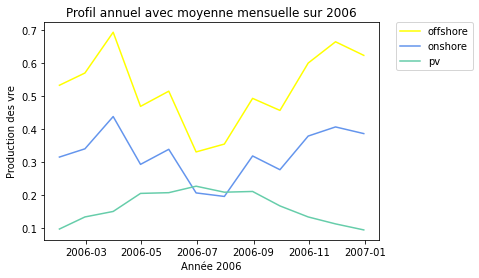

In [22]:
plt.plot(monthly_mean_2006["offshore"], label="offshore", c=colors[-3])
plt.plot(monthly_mean_2006["onshore"], label="onshore", c=colors[2])
plt.plot(monthly_mean_2006["pv"], label="pv", c=colors[1])
plt.title("Profil annuel avec moyenne mensuelle sur 2006")
plt.xlabel("Année 2006")
plt.ylabel("Production des vre")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#### 2.2 Moyenne glissante sur l'année 2006

In [39]:
monthly_rol_mean_2006 = profil_2006.rolling(window = 8760, center = True).mean() #moyenne glissante sur 
monthly_rol_mean_2006.shape

(8760, 3)

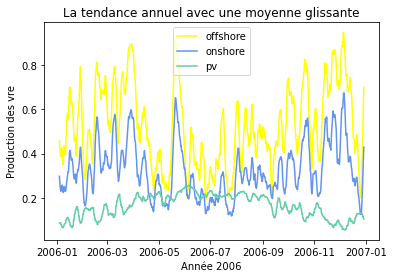

In [43]:
plt.plot(monthly_rol_mean_2006["offshore"], label="offshore", c=colors[-3])
plt.plot(monthly_rol_mean_2006["onshore"], label="onshore", c=colors[2])
plt.plot(monthly_rol_mean_2006["pv"], label="pv", c=colors[1])
plt.title("La tendance annuel avec une moyenne glissante") #tendance roulante
plt.xlabel("Année 2006")
plt.ylabel("Production des vre")
plt.legend()
plt.show()

#### 2.3 Boxplots des tendances de production des vre sur l'année 2006

In [44]:
# Extract the year, month, date separately using the index set
profil_2006['Year'] = profil_2006.index.year
profil_2006['Month'] = profil_2006.index.month
profil_2006['Weekday_Name'] = profil_2006.index.weekday

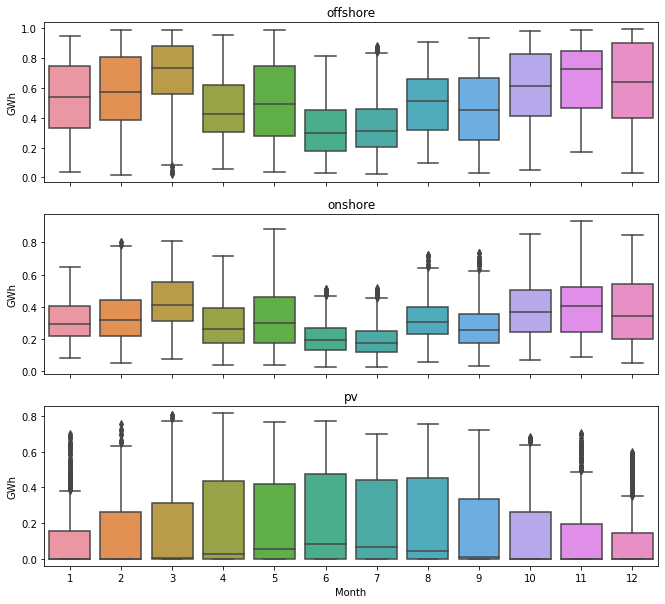

In [45]:
import seaborn as sns
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['offshore', 'onshore', 'pv'], axes):
    sns.boxplot(data=profil_2006, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Keep the x-axis label for only the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

### 3. Profils sur plusieurs années

#### 3.1 Profils offshore

In [14]:
profils_off_month = profils_off.resample('M').mean()  # M : moyenne de la production par mois
profils_off_month.head()

,2013,2014,2015,2016,2017
1970-01-31,0.529048,0.695092,0.652542,0.726429,0.502453
1970-02-28,0.623539,0.806214,0.602838,0.679658,0.624213
1970-03-31,0.557033,0.479566,0.561559,0.585978,0.606497
1970-04-30,0.594045,0.438106,0.472404,0.480466,0.373078
1970-05-31,0.512842,0.482167,0.511554,0.421825,0.456978


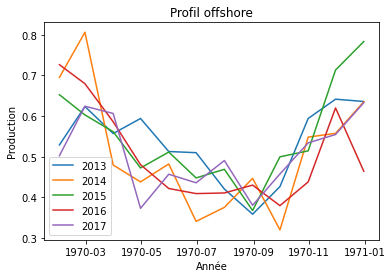

In [11]:
plt.plot(profils_off_month, label=["2013", "2014", "2015", "2016", "2017"])
plt.xlabel("Année")
plt.ylabel("Production")
plt.title("Profil offshore")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#### 3.2 Profils onshore

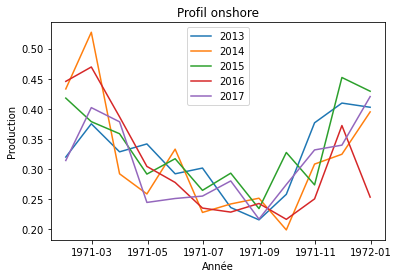

In [12]:
profils_on_month = profils_on.resample('M').mean()   # M : moyenne de la production par mois
plt.plot(profils_on_month, label=["2013", "2014", "2015", "2016", "2017"])
plt.xlabel("Année")
plt.ylabel("Production")
plt.title("Profil onshore")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#### 3.3 Profils pv

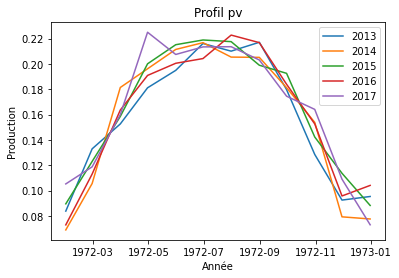

In [13]:
profils_pv_month = profils_pv.resample('M').mean()   # M : moyenne de la production par mois
plt.plot(profils_pv_month, label=["2013", "2014", "2015", "2016", "2017"])
plt.xlabel("Année")
plt.ylabel("Production")
plt.title("Profil pv")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()